### ANN assignment number 7

In [ ]:
print('Rupesh')

Rupesh


In [ ]:
#importing all required libraries
import tensorflow as tf
import numpy as np

In [ ]:
#Create the inputs and outputs
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [ ]:
#Create a neural network which takes 4 inputs and gives one output
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2,activation='elu',kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(1,activation='elu',kernel_initializer='HeNormal'),
])
model.compile(loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [ ]:
#Look at what the weights are initially
model.build((None,2))
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 1.9072981 , -0.26771167],
        [-0.45173278,  0.6576625 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.7145134],
        [0.9330334]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Using backpropagation to fine tune the weights
model.fit(x,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 13ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 8.2867e-13 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 8.2867e-13 - accurac

In [ ]:
#Look how the weights have changed due to backpropagation
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 1.6678782, -2.2451355],
        [-1.0720377,  1.1789134]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.07807786, -0.4578345 ], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.169034],
        [1.679157]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.5255597], dtype=float32)>]

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 80ms/step


array([[7.1525574e-07],
       [9.9999952e-01],
       [9.9999863e-01],
       [8.3446503e-07]], dtype=float32)

1/1 [==============================] - 0s 22ms/step


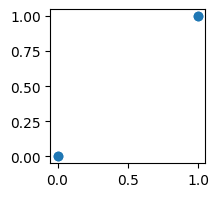

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.scatter(y,model.predict(x))
plt.show()

### ANN assignment no 11 and 12

<h3><b>Name is Rupesh</b></h3>

Its image classification challenge. So we are going to use CIFAR-10 dataset for image classification

In [ ]:
#Import all libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#getting the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


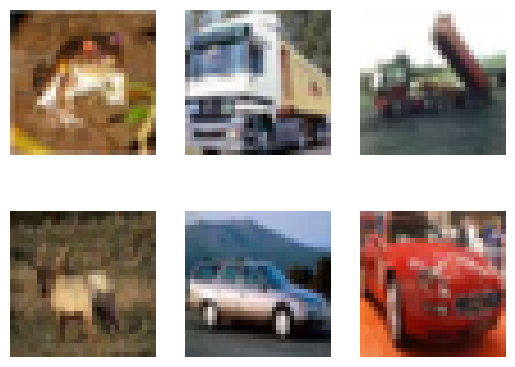

In [ ]:
#Seeing some to the images
fig,axes=plt.subplots(2,3)
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.axis('off')

In [ ]:
# Here we use datagen image augmentation and normalizing the images
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255. ,
    rotation_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.1
)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [ ]:
#Lets create a simple CNN for image classification
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=3,padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,kernel_size=3,padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,kernel_size=3,padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],optimizer=tf.keras.optimizers.Adam())

In [ ]:
model.fit(train_datagen.flow(x_train,y_train,batch_size=32),validation_data=test_datagen.flow(x_test,y_test),epochs=12)

Epoch 1/12
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4858 - sparse_categorical_accuracy: 0.4794 - val_loss: 1.2412 - val_sparse_categorical_accuracy: 0.5683
Epoch 2/12
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2697 - sparse_categorical_accuracy: 0.5631 - val_loss: 1.1609 - val_sparse_categorical_accuracy: 0.6005
Epoch 3/12
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2291 - sparse_categorical_accuracy: 0.5775 - val_loss: 1.1195 - val_sparse_categorical_accuracy: 0.6207
Epoch 4/12
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1961 - sparse_categorical_accuracy: 0.5916 - val_loss: 1.0791 - val_sparse_categorical_accuracy: 0.6285
Epoch 5/12
1563/1563 [==============================] - 34s 21ms/step - loss: 1.1798 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.0832 - val_sparse_categorical_accuracy: 0.6336
Epoch 6/12
1563/1563 [==============================] - 33s 21ms/step - loss: 1.

got 67.18% accuracy with very simple model

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, None, None, 128)  0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, None, None, 128)   147584    
                                                                 
 dropout_1 (Dropout)         (None, None, None, 128)  

### ANN assignment No 13

<h3><b>Name is Rupesh</b></h3>

Handwritten Digit Recognition

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train,x_test=x_train[...,np.newaxis],x_test[...,np.newaxis]

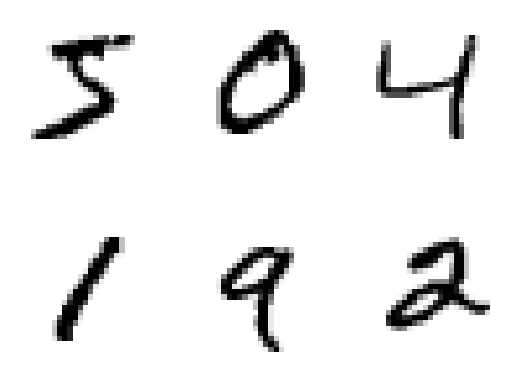

In [ ]:
fig,axes=plt.subplots(2,3)
for i,ax in enumerate(axes.flat):
  ax.imshow(x_train[i],cmap='binary')
  ax.axis('off')

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.12,
    width_shift_range=0.05,
    rescale=1/255.
)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=3,padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,kernel_size=3,padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,kernel_size=3,padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],optimizer=tf.keras.optimizers.Adam())

In [ ]:
model.fit(train_datagen.flow(x_train,y_train,batch_size=32),validation_data=test_datagen.flow(x_test,y_test),epochs=12)

Epoch 1/12
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1811 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9817
Epoch 2/12
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1040 - sparse_categorical_accuracy: 0.9690 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 0.9597
Epoch 3/12
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.0714 - val_sparse_categorical_accuracy: 0.9777
Epoch 4/12
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0926 - sparse_categorical_accuracy: 0.9734 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9818
Epoch 5/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9734 - val_loss: 0.0604 - val_sparse_categorical_accuracy: 0.9824
Epoch 6/12
1875/1875 [==============================] - 25s 14ms/step - loss: 0.

got 98.31% accuracy with a very simple model

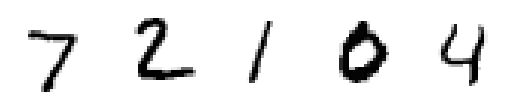

In [ ]:
#What those images actually are
fig,axes=plt.subplots(1,5)
for i,ax in enumerate(axes.flat):
  ax.imshow(x_test[i],cmap='binary')
  ax.axis('off')

In [ ]:
# And this is what the model predicts about above images
np.argmax(model.predict(x_test[:5]),axis=0)[:5]

1/1 [==============================] - 0s 19ms/step


array([3, 2, 1, 0, 4])